# Exercise Score Card

Author: Samuel Natamihardja<br>
Date: November 27th 2019

### Import Library

In [1]:
#data wrangling
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#model evaluation
from sklearn.metrics import auc, confusion_matrix, roc_auc_score, classification_report, roc_curve, accuracy_score
from sklearn import metrics

#scorecard
import scorecardpy as sc

### Import Dataset

In [2]:
dataset = pd.read_csv('dataset/german_credit.csv')
dataset.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
print('Data shape {}' .format(dataset.shape))

Data shape (1000, 21)


### Feature Engineering

In [4]:
# make dummy for 'foreign_worker'
dummy = pd.get_dummies(data = dataset['foreign_worker'], prefix = 'foreign_worker')

# concat or_data with dummy
dataset = pd.concat([dataset, dummy], axis = 1)

dataset.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,foreign_worker_no,foreign_worker_yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,22,none,own,1,skilled employee / official,1,none,yes,0,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,49,none,own,1,unskilled - resident,2,none,yes,0,1


In [5]:
# make dummy for 'present_emp_since'
dummy = pd.get_dummies(data = dataset['present_emp_since'])

# concat or_data with dummy
dataset = pd.concat([dataset, dummy], axis = 1)

dataset.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,people_under_maintenance,telephone,foreign_worker,foreign_worker_no,foreign_worker_yes,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,1,"yes, registered under the customers name",yes,0,1,1,0,0,0,0
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,1,none,yes,0,1,0,0,1,0,0
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,2,none,yes,0,1,0,0,0,1,0


In [6]:
print("null value:",dataset.isnull().sum().sum())

null value: 0


In [7]:
dataset.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_no,foreign_worker_yes,.. >= 7 years,... < 1 year,1 <= ... < 4 years,4 <= ... < 7 years,unemployed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.037000,0.963000,0.253000,0.172000,0.339000,0.174000,0.062000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.188856,0.188856,0.434948,0.377569,0.473607,0.379299,0.241276
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Plot

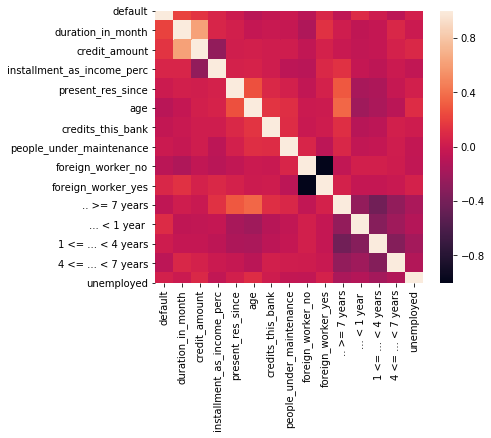

In [8]:
corr = dataset.corr()

plt.figure(figsize=[6, 5])
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

### Logistic Regression

In [9]:
# make a copy data for modelling
log_reg = dataset[['duration_in_month', 'credit_amount', 'unemployed', 'installment_as_income_perc', 
                'present_res_since', 'age', 'credits_this_bank', 'people_under_maintenance', 'foreign_worker_yes', 
                'default']].copy()

#define X and y
X = log_reg.drop('default', axis = 1)
y = log_reg['default']


#split log_reg dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.head()

,duration_in_month,credit_amount,unemployed,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_yes
29,60,6836,0,3,4,63,2,1,1
535,21,2319,0,2,1,33,1,1,1
695,6,1236,0,2,4,50,1,1,1
557,21,5003,0,1,4,29,2,1,1
836,12,886,0,4,2,21,1,1,1


In [11]:
#create an object for Logistic Regression
model_lr = LogisticRegression()
#fit model
model_lr.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

In [13]:
# confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix for train:')
print(cm_train)

cm_test = confusion_matrix(y_test, y_pred_test)
print('\nConfusion matrix for test:')
print(cm_test)

Confusion matrix for train:
[[536  23]
 [210  31]]

Confusion matrix for test:
[[140   1]
 [ 51   8]]


In [14]:
# AUC and classification report
auc_train = round(roc_auc_score(y_train, y_pred_train), 4)
print('AUC train = {}' .format(auc_train))
print('Classification report for train:')
print(classification_report(y_train, y_pred_train))


auc_test = round(roc_auc_score(y_test, y_pred_test), 4)
print('\nAUC test = {}' .format(auc_test))
print('Classification report for test:')
print(classification_report(y_test, y_pred_test))

AUC train = 0.5437
Classification report for train:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       559
           1       0.57      0.13      0.21       241

    accuracy                           0.71       800
   macro avg       0.65      0.54      0.52       800
weighted avg       0.67      0.71      0.64       800


AUC test = 0.5643
Classification report for test:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       141
           1       0.89      0.14      0.24        59

    accuracy                           0.74       200
   macro avg       0.81      0.56      0.54       200
weighted avg       0.78      0.74      0.66       200



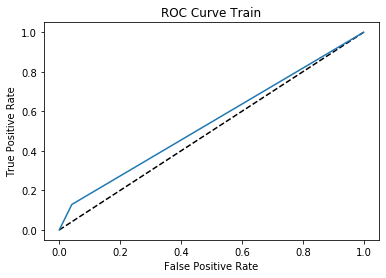

In [15]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train')
plt.show()

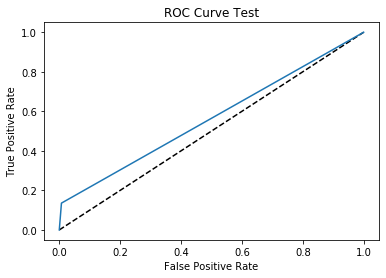

In [16]:
# generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Test')
plt.show()

# Score Card

In [17]:
#prepare data
log_reg.head()

,duration_in_month,credit_amount,unemployed,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,foreign_worker_yes,default
0,6,1169,0,4,4,67,2,1,1,0
1,48,5951,0,2,2,22,1,1,1,1
2,12,2096,0,2,3,49,1,2,1,0
3,42,7882,0,2,4,45,1,2,1,0
4,24,4870,0,3,4,53,2,2,1,1


In [18]:
#filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(log_reg, y="default")

[INFO] filtering variables ...


In [19]:
#breaking dt into train and test
train, test = sc.split_df(dt_s,'default').values()

In [20]:
# woe binning ------
bins = sc.woebin(dt_s, y="default")

[INFO] creating woe binning ...


In [21]:
#test bin result
bins['credit_amount']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,credit_amount,"[-inf,1400.0)",267,0.267,185,82,0.307116,0.033661,0.000305,0.18122,1400.0,False
1,credit_amount,"[1400.0,1800.0)",105,0.105,87,18,0.171429,-0.728239,0.046815,0.18122,1800.0,False
2,credit_amount,"[1800.0,4000.0)",382,0.382,287,95,0.248691,-0.258307,0.024109,0.18122,4000.0,False
3,credit_amount,"[4000.0,9200.0)",196,0.196,120,76,0.387755,0.390539,0.031987,0.18122,9200.0,False
4,credit_amount,"[9200.0,inf)",50,0.050,21,29,0.580000,1.170071,0.078005,0.18122,inf,False


In [22]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins = bins)
test_woe = sc.woebin_ply(test, bins = bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [23]:
#prepare training and test data
X_train_sc = train_woe.loc[:,train_woe.columns != 'default']
y_train_sc = train_woe.loc[:,'default']

X_test_sc = test_woe.loc[:,train_woe.columns != 'default']
y_test_sc = test_woe.loc[:,'default']

In [24]:
train_woe.head()

,default,age_woe,installment_as_income_perc_woe,duration_in_month_woe,credit_amount_woe
0,0,-0.212371,0.103961,-1.312186,0.033661
2,0,-0.212371,-0.155466,-0.346625,-0.258307
4,1,-0.212371,0.103961,0.108688,0.390539
5,0,-0.872488,-0.155466,0.524524,0.390539
6,0,-0.212371,0.103961,0.108688,-0.258307


In [25]:
#create an object for Logistic Regression
model_lr_sc = LogisticRegression()

#fit model
model_lr_sc.fit(X_train_sc, y_train_sc)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#beta
model_lr_sc.coef_

array([[1.09763471, 1.13289831, 0.68683581, 0.76002628]])

In [27]:
#intercept
model_lr_sc.intercept_

array([-0.81740158])

In [28]:
y_pred_train_sc = model_lr_sc.predict_proba(X_train_sc)[:,1]
y_pred_test_sc = model_lr_sc.predict_proba(X_test_sc)[:,1]

D:\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


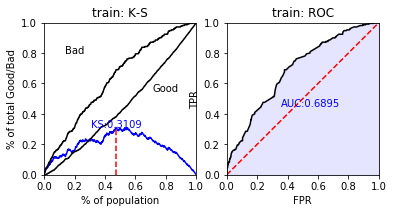

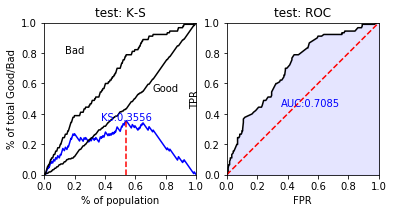

In [29]:
train_perf = sc.perf_eva(y_train_sc, y_pred_train_sc, title = "train")
test_perf = sc.perf_eva(y_test_sc, y_pred_test_sc, title = "test")

In [30]:
# score ------
card = sc.scorecard(bins, model_lr_sc, X_train_sc.columns,pdo=20)

# credit score
train_score_sc = sc.scorecard_ply(train, card, print_step=0)
test_score_sc = sc.scorecard_ply(test, card, print_step=0)

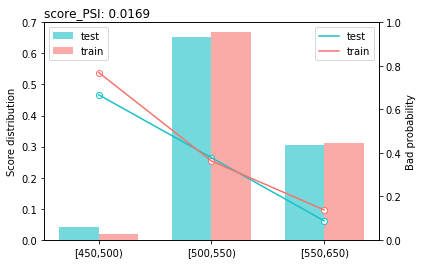

{'psi':   variable       PSI
 0    score  0.016934, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [31]:
# psi(population stability index)
sc.perf_psi(
  score = {'train':train_score_sc, 'test':test_score_sc},
  label = {'train':y_train_sc, 'test':y_test_sc}
)

In [32]:
#initial dataframe
binning_list =card['credit_amount']

for column in X_train_sc.drop('credit_amount_woe', axis=1).columns:
    binning_list = binning_list.append(card[column.replace('_woe','')])

In [33]:
#scorecard pointing system
binning_list

,variable,bin,points
13,credit_amount,"[-inf,1400.0)",-1.0
14,credit_amount,"[1400.0,1800.0)",16.0
15,credit_amount,"[1800.0,4000.0)",6.0
16,credit_amount,"[4000.0,9200.0)",-9.0
17,credit_amount,"[9200.0,inf)",-26.0
0,age,"[-inf,26.0)",-17.0
1,age,"[26.0,28.0)",5.0
2,age,"[28.0,35.0)",-5.0
3,age,"[35.0,37.0)",28.0
4,age,"[37.0,inf)",7.0


#### Try Scorecard

In [34]:
#scorecard points based on above pointing system per bin
y_pred_woe= sc.scorecard_ply(X, card)['score']

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [35]:
display(y_pred_woe.head())

0    568.0
1    496.0
2    564.0
3    532.0
4    532.0
Name: score, dtype: float64

#### Try predict from woe bin

In [36]:
#staging step for getting column name
X_train_clean_list = list(X_train_sc.columns)
X_train_clean_list = [X_train_clean_list.replace('_woe', '') for X_train_clean_list in X_train_clean_list]
X_train_clean_list

['age', 'installment_as_income_perc', 'duration_in_month', 'credit_amount']

In [37]:
#woe bin 
sc.woebin_ply(X[X_train_clean_list], bins = bins).head()

[INFO] converting into woe values ...


,age_woe,installment_as_income_perc_woe,duration_in_month_woe,credit_amount_woe
0,-0.212371,0.103961,-1.312186,0.033661
1,0.528844,-0.155466,1.134980,0.390539
2,-0.212371,-0.155466,-0.346625,-0.258307
3,-0.212371,-0.155466,0.524524,0.390539
4,-0.212371,0.103961,0.108688,0.390539


In [38]:
#predict proba from woe
x_X = model_lr_sc.predict_proba(sc.woebin_ply(X[X_train_clean_list], bins = bins))[:,1]

[INFO] converting into woe values ...


In [39]:
x_X

array([0.14083115, 0.66000433, 0.15962375, 0.36133995, 0.3632561 ,
       0.21515626, 0.25838105, 0.21515626, 0.15962375, 0.45715781,
       0.41784225, 0.72256453, 0.21195317, 0.30311752, 0.16400569,
       0.39101999, 0.25838105, 0.48960641, 0.50780067, 0.33963287,
       0.20308469, 0.08913744, 0.14559006, 0.20308469, 0.16734432,
       0.05042815, 0.14083115, 0.24136299, 0.16235102, 0.535847  ,
       0.14443072, 0.31030351, 0.38563572, 0.24136299, 0.20836388,
       0.72256453, 0.53260691, 0.25838105, 0.19168068, 0.41784225,
       0.33963287, 0.25185224, 0.29835065, 0.46252881, 0.535847  ,
       0.13356621, 0.31674114, 0.1982432 , 0.21815077, 0.27335715,
       0.33963287, 0.36024963, 0.41784225, 0.27711139, 0.31674114,
       0.10391787, 0.23723668, 0.60165865, 0.44008523, 0.63133208,
       0.20058169, 0.15132001, 0.31674114, 0.77829848, 0.2693473 ,
       0.3632561 , 0.21899019, 0.41784225, 0.31674114, 0.51119687,
       0.42832958, 0.14083115, 0.24136299, 0.36133995, 0.31674

In [40]:
#correlation coeficient
np.corrcoef(y_pred_woe,x_X)

array([[ 1.        , -0.98411363],
       [-0.98411363,  1.        ]])